#### Let's learn the T-distribution! Note: Learn about the normal distribution first!

For previous distributions the sample size was assumed large (N>30). For sample sizes that are less than 30, otherwise (N<30). Note: Sometimes the t-distribution is known as the student distribution.

The t-distribution allows for use of small samples, but does so by **sacrificing certainty** with a margin-of-error trade-off. **The t-distribution takes into account the sample size using n-1 degrees of freedom, which means there is a different t-distribution for every different sample size**. If we see the t-distribution against a normal distribution, you'll notice the tail ends increase as the peak get 'squished' down. 

**It's important to note, that as n gets larger, the t-distribution converges into a normal distribution.**

To further explain degrees of freedom and how it relates to the t-distribution, **you can think of degrees of freedom as an adjustment to the sample size, such as (n-1)**. This is connected to the idea that we are estimating something of a larger population, in practice **it gives a slightly larger margin of error in the estimate**.

Note from Wiki: In statistics, the number of degrees of freedom is the number of values in the final calculation of a statistic that are free to vary. The number of independent ways by which a dynamic system can move, without violating any constraint imposed on it, is called number of degrees of freedom. https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)

##### Degrees of Freedom

There are actually many different t distributions. The particular form of the t distribution is determined by its degrees of freedom. **The degrees of freedom refers to the number of independent observations in a set of data**.

When estimating a mean score or a proportion from a single sample, **the number of independent observations is equal to the sample size minus one**. Hence, the distribution of the t statistic from samples of size 8 would be described by a t distribution having 8 - 1 or 7 degrees of freedom. Similarly, a t distribution having 15 degrees of freedom would be used with a sample of size 16.

For other applications, the degrees of freedom may be calculated differently. We will describe those computations as they come up.

<p align="dist">
<img src="T-Z_distribution.jpg" alt="Drawing" width="500">
</p>

Let's define a new variable called t, where
:
$$t=\frac{\overline{X}-\mu}{s}\sqrt{N-1}=\frac{\overline{X}-\mu}{s/\sqrt{N}}$$

which is analogous to the z statistic (https://en.wikipedia.org/wiki/Z-test) given by $$z=\frac{\overline{X}-\mu}{\sigma/\sqrt{N}}$$

The sampling distribution for t can be obtained:

## $$  f(t) = \frac {\varGamma(\frac{v+1}{2})}{\sqrt{v\pi}\varGamma(\frac{v}{2})} (1+\frac{t^2}{v})^{-\frac{v+1}{2}}$$

Where the gamma function is: $$\varGamma(n)=(n-1)!$$

And v is the number of degrees of freedom, typically equal to N-1. 

Similar to a z-score table used with a normal distribution, a t-distribution uses a t-table. Knowing the degrees of freedom and the desired cumulative probability (e.g. P(T >= t) ) we can find the value of t. Here is an example of a lookup table for a t-distribution: 

http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf


Now let's see how to get the t-distribution in Python using scipy!

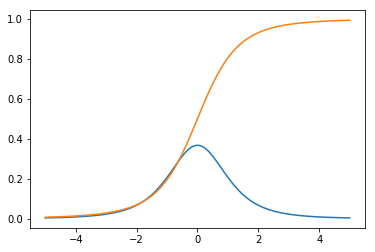

In [187]:
#Import for plots
import matplotlib.pyplot as plt
%matplotlib inline

#Import the stats library
from scipy.stats import t

#import numpy
import numpy as np

# Create x range
x = np.linspace(-5, 5, 100)

# Create the t distribution with scipy
# Freeze the distribution and display the frozen ``pdf``:
# t(df=degrees of freedom)
rv = t(3)

# Plot the PDF versus the x range
plt.plot(x, rv.pdf(x))
plt.plot(x, rv.cdf(x))

In [145]:
mean, var, skew, kurt = t.stats(3, moments='mvsk')

In [146]:
print mean
print var
print skew
print kurt

0.0
3.0
nan
nan


### Problem

Acme Corporation manufactures light bulbs. The CEO claims that an average Acme light bulb lasts 300 days. A researcher randomly selects 15 bulbs for testing. The sampled bulbs last an average of 290 days, with a standard deviation of 50 days. If the CEO's claim were true, what is the probability that 15 randomly selected bulbs would have an average life of no more than 290 days?

Note: There are two ways to solve this problem, using the T Distribution Calculator. Both approaches are presented below. Solution A is the traditional approach. It requires you to compute the t statistic, based on data presented in the problem description. Then, you use the T Distribution Calculator to find the probability. Solution B is easier. You simply enter the problem data into the T Distribution Calculator. The calculator computes a t statistic "behind the scenes", and displays the probability. Both approaches come up with exactly the same answer.

Solution A

The first thing we need to do is compute the t statistic, based on the following equation:

$$t = \frac{(x - \mu)}{s / \sqrt( n )}$$ 
$$t = \frac{( 290 - 300 )}{50 / \sqrt( 15)} = -10 / 12.909945 = - 0.7745966 $$



[Note](http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/introductory-concepts/p-value-and-significance-level/manually-calculate-p-value/):

Introduction to calculating a p-value

The p-value is calculated using the test statistic calculated from the samples, the assumed distribution, and the type of test being done (lower-tailed test, upper-tailed test, or two-tailed test).

The p-value for:
* a lower-tailed test is specified by: p-value = P(TS < ts | H0 is true) = cdf(ts)
* an upper-tailed test is specified by: p-value = P(TS > ts | H0 is true) = 1 - cdf(ts)
* a two-sided test is specified by: p-value = 2 * P(TS > |ts| | H0 is true) = 2 * (1 - cdf(|ts|))

Where:

* P: Probability of a random variable having a range of values.
* TS: Random variable associated with the assumed distribution.
* ts: The test statistic calculated from your sample.
* cdf(): Cumulative density function of the assumed distribution.

In [147]:
# sample mean
sm = 290
# sample standard devitaion 
sd = 50
# population mean
m = 300
# sample size
n = 15
# degrees of freedom n-1 = 15-1
df = 14

In [148]:
rv = t(df, loc=sm, scale=sd)
print rv.mean()
print rv.std()

290.0
54.0061724867


In [149]:
# Create x range
x = np.linspace(0, 600, 100)

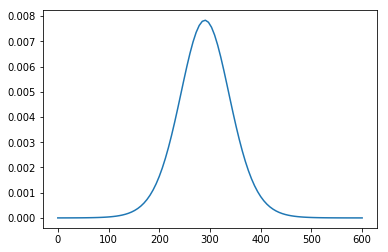

In [150]:
# Plot the PDF versus the x range
plt.plot(x, rv.pdf(x))

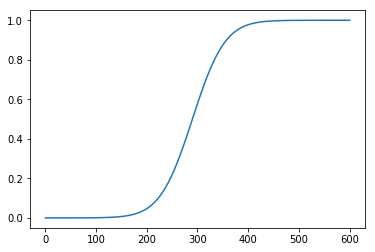

In [151]:
plt.plot(x, rv.cdf(x))

Have a look at [t-test-and-ks-test](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test)

In [152]:
tt = (sm - m) / (sd/float(np.sqrt(n)))  # t-statistic for mean
print tt

-0.774596669241


In [153]:
# Survival function gives the probability that the variate has a value greater than the given value; SF = 1 - CDF.
pval = t.sf(np.abs(tt), n - 1)*2  # two-sided pvalue = Prob(abs(t)>tt) Just meaninful when the distribution
# is symmetric
print pval

0.451462584516


In [154]:
# Comulative prob with 15 degrees of freedoom
# CDF gives the probability that the variate has a value less than or equal to the given value. p values= Prob(abs(t)<=tt)
# Lower-tailed test
t.cdf(tt, df=n - 1)

0.22573129225779137

In [155]:
# Upper-tailed test
t.sf(np.abs(tt), n - 1)

0.22573129225779137

The calculator displays the cumulative probability: 0.226. Hence, if the true bulb life were 300 days, there is a 22.6% chance that the average bulb life for 15 randomly selected bulbs would be less than or equal to 290 days. Hence, there is a 22.6% chance that the average sampled light bulb will burn out within 290 days.

In [156]:
# getting samples to use the t-test implemented in scipy
# This draws  a random sample, so it willl awlays change and we can't compare with the results with ttest_1samp(x, m))
x = rv.rvs(90)
x.mean()

297.84552291731393

In [157]:
stats.ttest_1samp(x, m)

Ttest_1sampResult(statistic=-0.3673325759925179, pvalue=0.71424298778106421)

In [158]:
t.ppf(q=0.05,  # Quantile to check
            df=14)  # Degrees of freedom

-1.7613101357748564

In [159]:
t.ppf(q=0.95,  # Quantile to check
            df=14)  # Degrees of freedom

1.7613101357748562

Statisticians use $t_{\alpha}$ to represent the t statistic that has a cumulative probability of $(1 - \alpha)$. For example, suppose we were interested in the t statistic having a cumulative probability of 0.95. In this example, α would be equal to (1 - 0.95) or 0.05. We would refer to the t statistic as $t_{0.05}$

Of course, the value of $t_{0.05}$ depends on the number of degrees of freedom. For example, with 2 degrees of freedom, that $t_{0.05}$ is equal to 2.92; but with 20 degrees of freedom, that $t_{0.05}$ is equal to 1.725.

Note: Because the t distribution is symmetric about a mean of zero, the following is true.

$t_{\alpha} = -t_1 - \alpha$       And       $t_1 - \alpha = -t_{\alpha}$

Thus, if $t_{0.05} = 2.92$, then $t_{0.95} = -2.92$.

In [160]:
# http://stackoverflow.com/questions/17203403/student-t-confidence-interval-in-python
# T-interval interval(alpha, df, loc, scale)
sigma = 50/math.sqrt(15) # Standard dev estimate
t.interval(0.95, 14, loc=290, scale=sigma)  # 95% confidence interval

(262.31092292176794, 317.68907707823206)

This capture the population mean of 300

Additional resources can be found here:

1.) http://en.wikipedia.org/wiki/Student%27s_t-distribution

2.) http://mathworld.wolfram.com/Studentst-Distribution.html

3.) http://stattrek.com/probability-distributions/t-distribution.aspx

Useful example Juan: http://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa-in-python

## Excerecise http://hamelg.blogspot.co.uk/2015/11/python-for-data-analysis-part-24.html

#### Python for Data Analysis Part 24: Hypothesis Testing and the T-Test

[Point estimates and confidence intervals](http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-23-point.html) are basic inference tools that act as the foundation for another inference technique: statistical hypothesis testing. [Statistical hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing) is a framework for determining whether observed data deviates from what is expected. Python's scipy.stats library contains an array of functions that make it easy to carry out hypothesis tests.

#### Hypothesis Testing Basics

Statistical hypothesis tests are based a statement called the null hypothesis that assumes nothing interesting is going on between whatever variables you are testing. The exact form of the null hypothesis varies from one type test to another: if you are testing whether groups differ, the null hypothesis states that the groups are the same. For instance, if you wanted to test whether the average age of voters in your home state differs from the national average, the null hypothesis would be that there is no difference between the average ages.

The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: that something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out. Continuing with the example above, the alternative hypothesis would be that the average age of voters in your state does in fact differ from the national average.

Once you have the null and alternative hypothesis in hand, you choose a significance level (often denoted by the Greek letter α.). The significance level is a probability threshold that determines when you reject the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the p-value.
The T-test is a statistical test used to determine whether a numeric data sample of differs significantly from the population or whether two samples differ from one another.

#### One-Sample T-Test
A one-sample t-test **checks whether a sample mean differs from the population mean** (null hypothesis states that the sample mean is equal to the population mean). Let's create some dummy age data for the population of voters in the entire country and a sample of voters in Minnesota and test the whether the average age of voters Minnesota differs from the population:

In [161]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

In [162]:
np.random.seed(6)

In [163]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

(array([  2.00000000e+00,   1.90000000e+01,   1.85000000e+02,
          9.38000000e+02,   3.66300000e+03,   9.95400000e+03,
          1.92670000e+04,   2.76040000e+04,   2.96260000e+04,
          2.56570000e+04,   2.12200000e+04,   7.28400000e+03,
          3.15100000e+03,   1.02800000e+03,   3.02000000e+02,
          8.60000000e+01,   8.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   1.00000000e+00]),
 array([ 27. ,  30.1,  33.2,  36.3,  39.4,  42.5,  45.6,  48.7,  51.8,
         54.9,  58. ,  61.1,  64.2,  67.3,  70.4,  73.5,  76.6,  79.7,
         82.8,  85.9,  89. ]),
 <a list of 20 Patch objects>)

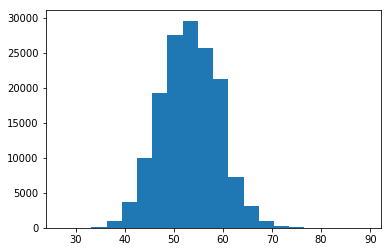

In [164]:
plt.hist(population_ages1, bins=20)

(array([  1.03600000e+03,   2.10550000e+04,   3.62800000e+04,
          3.33950000e+04,   6.93000000e+03,   2.38200000e+03,
          3.72400000e+03,   1.53520000e+04,   2.25270000e+04,
          3.90450000e+04,   3.51890000e+04,   1.72280000e+04,
          1.12760000e+04,   3.15100000e+03,   1.17700000e+03,
          1.96000000e+02,   4.70000000e+01,   7.00000000e+00,
          2.00000000e+00,   1.00000000e+00]),
 array([ 18.  ,  21.55,  25.1 ,  28.65,  32.2 ,  35.75,  39.3 ,  42.85,
         46.4 ,  49.95,  53.5 ,  57.05,  60.6 ,  64.15,  67.7 ,  71.25,
         74.8 ,  78.35,  81.9 ,  85.45,  89.  ]),
 <a list of 20 Patch objects>)

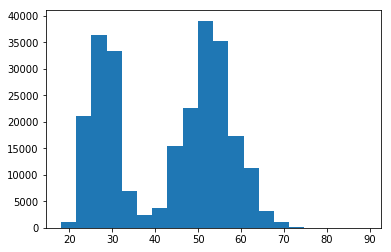

In [165]:
plt.hist(population_ages, bins=20)

We can see here that 'loc' option is shifting the mean to 18+

In [166]:
print population_ages1.mean()
print population_ages2.mean()

53.00536
27.99224


In [167]:
# The sample size is small
minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

(array([ 2.,  3.,  1.,  8.,  1.,  3.,  1.,  3.,  2.,  0.,  4.,  2.,  6.,
         4.,  2.,  3.,  2.,  2.,  0.,  1.]),
 array([ 22. ,  23.9,  25.8,  27.7,  29.6,  31.5,  33.4,  35.3,  37.2,
         39.1,  41. ,  42.9,  44.8,  46.7,  48.6,  50.5,  52.4,  54.3,
         56.2,  58.1,  60. ]),
 <a list of 20 Patch objects>)

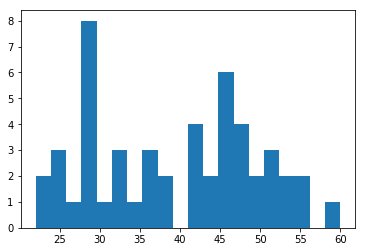

In [168]:
plt.hist(minnesota_ages, bins=20)

In [169]:
print minnesota_ages1.mean()
print minnesota_ages2.mean()

46.5
28.4


In [170]:
print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


Notice that we used a slightly different combination of distributions to generate the sample data for Minnesota, so we know that the two means are different. Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the **null hypothesis that the sample comes from the same distribution as the population**. To conduct a one sample t-test, we can the ``stats.ttest_1samp()`` [function](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html):

In [171]:
t, p = stats.ttest_1samp(a= minnesota_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean
print t, p

-2.57427148837 0.0131186854251


Other t-test:
* ``stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')``: [Calculates the T-test for the means of two independent samples of scores.](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.ttest_ind.html)
[As reference also see this example in stackoverflow.](http://stackoverflow.com/questions/22611446/perform-2-sample-t-test)
* ``stats.ttest_rel(a, b, axis=0, nan_policy='propagate')``: [Calculates the T-test on TWO RELATED samples of scores, a and b.](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.ttest_rel.html)
* ``stats.ttest_1samp(a, popmean, axis=0)``: [Calculates the T-test for the mean of ONE group of scores.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html)


The test result shows the test statistic "t" is equal to -2.71. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom (we have 50 independent readings, 50-1=49), we reject the null hypothesis. We can check the quantiles with ``stats.t.ppf()`` (Percent point function (inverse of cdf — percentiles)):

In [172]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [175]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.0095752344892088

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the ``stats.t.cdf()`` function:

In [176]:
stats.t.cdf(x= -2.71042533631,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*

0.0092364122895919661

*Note: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.

Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0.0092 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level $\alpha=0.95$ (equal to 1-conf.level (1-$\alpha$) or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture population mean of 43:

In [177]:
sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(36.369669080722176, 42.15033091927782)

On the other hand, since there is a 1.3% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it would capture the population mean:

In [178]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(35.405479940921069, 43.114520059078927)

With a higher confidence level, we construct a wider confidence interval and increase the chances that it captures to true mean, thus making it less likely that we'll reject the null hypothesis. In this case, the p-value of 0.013 is greater than our significance level of 0.01 and **we fail to reject the null hypothesis**.

### Two-Sample T-Test

A two-sample t-test investigates **whether the means of two independent data samples differ from one another**. In a two-sample test, the null hypothesis is that the means of both groups are the same. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means. You can conduct a two-sample t-test by passing with the stats.ttest_ind() function. Let's generate a sample of voter age data for Wisconsin and test it against the sample we made earlier:

In [179]:
# new random seed
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


(array([ 3.,  3.,  4.,  5.,  2.,  1.,  2.,  2.,  1.,  2.,  5.,  2.,  7.,
         5.,  1.,  2.,  1.,  1.,  0.,  1.]),
 array([ 26.  ,  27.95,  29.9 ,  31.85,  33.8 ,  35.75,  37.7 ,  39.65,
         41.6 ,  43.55,  45.5 ,  47.45,  49.4 ,  51.35,  53.3 ,  55.25,
         57.2 ,  59.15,  61.1 ,  63.05,  65.  ]),
 <a list of 20 Patch objects>)

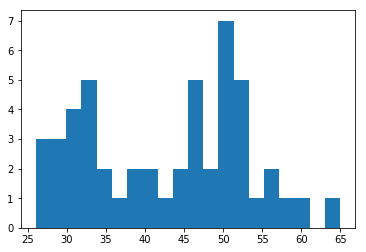

In [180]:
plt.hist(wisconsin_ages, bins=20)

In [181]:
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.090731043439577483)

The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical. If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%.

### Paired T-Test

The basic two sample t-test is designed for testing differences between independent groups. In some cases, you might be interested in **testing differences between samples of the same group at different points in time**. For instance, a hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment. A paired t-test lets you check whether the means of samples from the same group differ.
We can conduct a paired t-test using the scipy function ``stats.ttest_rel()``. Let's generate some dummy patient weight data and do a paired t-test:

In [184]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after - before})

weight_df.describe()             # Check a summary of the data

,weight_after,weight_before,weight_change
count,100.000000,100.000000,100.000000
mean,249.115171,250.345546,-1.230375
std,28.422183,28.132539,4.783696
min,165.913930,170.400443,-11.495286
25%,229.148236,230.421042,-4.046211
50%,251.134089,250.830805,-1.413463
75%,268.927258,270.637145,1.738673
max,316.720357,314.700233,9.759282


The summary shows that patients lost about 1.23 pounds on average after treatment. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level:

In [185]:
stats.ttest_rel(a = before, b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

The p-value in the test output shows that the chances of seeing this large of a difference between samples due to chance is just over 1%. The null-hypothesis is rejected, and we conclude that the result is stastically significant.

**In principle, a statistically significant result (usually a difference) is a result that's not attributed to chance. More technically, it means that if the Null Hypothesis is true (which means there really is no difference), there's a low probability of getting a result that large or larger.**

### Type I and Type II Error

The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories: [type I error and type II error](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors).

**Type I error** describes a situation where you reject the null hypothesis when it is actually true. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level $\alpha$, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive.

**Type II error** describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

More simply stated, a **type I error is detecting an effect that is not present, while a type II error is the failure to detect an effect that is present**.

Let's investigate these errors with a plot:

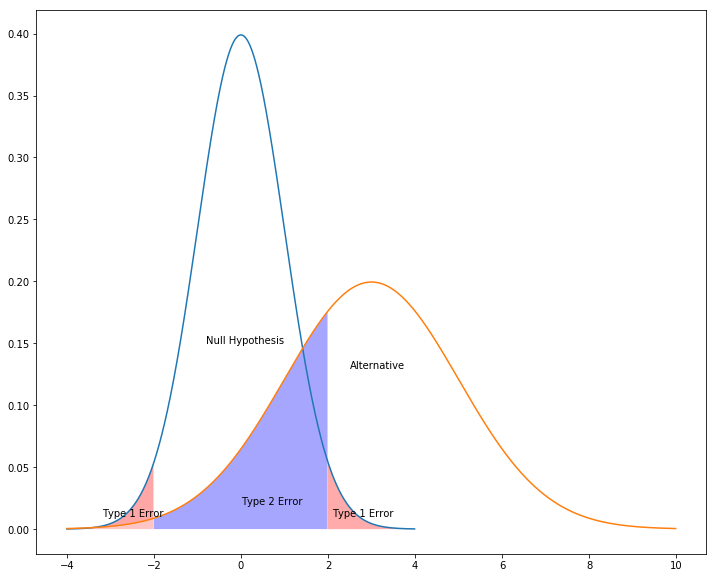

In [204]:
plt.figure(figsize=(12,10))

plt.plot(np.arange(-4, 4, 0.01), stats.norm.pdf(np.arange(-4, 4, 0.01)))

plt.plot(np.arange(-4, 10, 0.01), stats.norm.pdf(np.arange(-4, 10, 0.01), loc=3, scale=2))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

         
plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

In the plot above, the red areas indicate type I errors assuming the alternative hypothesis is not different from the null for a two-sided test with a 95% confidence level.

The blue area represents type II errors that occur when the alternative hypothesis is different from the null, as shown by the distribution on the right. Note that the Type II error rate is the area under the alternative distribution within the quantiles determined by the null distribution and the confidence level. We can calculate the type II error rate for the distributions above as follows:

In [206]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value
print lower_quantile
print upper_quantile

-1.95996398454
1.95996398454


In [207]:
# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)
print low

0.00656945090496


In [208]:
# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)  
print high

0.301525512017


In [209]:
# Area under the alternative, between the cutoffs (Type II error)
high-low

0.29495606111232298

With the normal distributions above, we'd fail to reject the null hypothesis about 30% of the time because the distributions are close enough together that they have significant overlap.

### Wrap Up
The t-test is a powerful tool for investigating the differences between sample and population means. T-tests operate on numeric variables; in the next lesson, we'll discuss statistical tests for categorical variables.